In [2]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

{0: 'YELLOW', 1: 'UNKNOWN', 2: 'GREEN', 3: 'RED'}
images/light_258.jpg


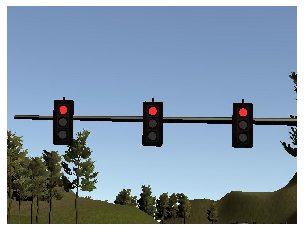

RED [id=3],(score = 0.99891)
YELLOW [id=0],(score = 0.00073)
GREEN [id=2],(score = 0.00035)
UNKNOWN [id=1],(score = 0.00001)

images/light_green.jpg


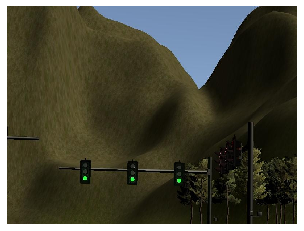

GREEN [id=2],(score = 0.99984)
RED [id=3],(score = 0.00012)
YELLOW [id=0],(score = 0.00004)
UNKNOWN [id=1],(score = 0.00000)

images/light_328.jpg


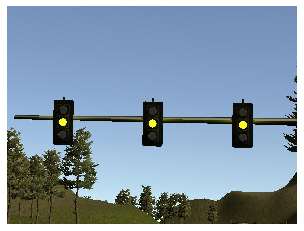

YELLOW [id=0],(score = 0.99847)
GREEN [id=2],(score = 0.00103)
RED [id=3],(score = 0.00049)
UNKNOWN [id=1],(score = 0.00001)

images/light_red.jpg


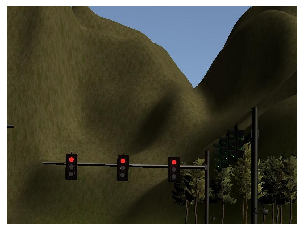

RED [id=3],(score = 0.99832)
YELLOW [id=0],(score = 0.00136)
GREEN [id=2],(score = 0.00029)
UNKNOWN [id=1],(score = 0.00003)

images/light_318.jpg


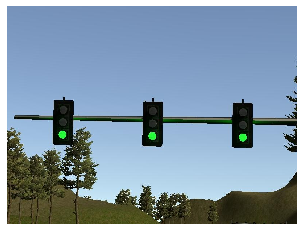

GREEN [id=2],(score = 0.99603)
YELLOW [id=0],(score = 0.00364)
RED [id=3],(score = 0.00032)
UNKNOWN [id=1],(score = 0.00001)

images/light_319.jpg


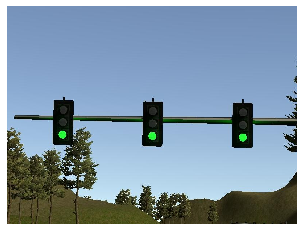

GREEN [id=2],(score = 0.99641)
YELLOW [id=0],(score = 0.00331)
RED [id=3],(score = 0.00027)
UNKNOWN [id=1],(score = 0.00001)

images/light_yello.jpg


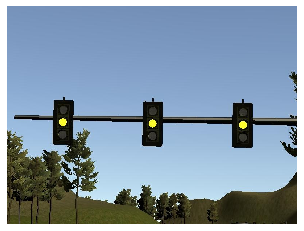

YELLOW [id=0],(score = 0.99859)
GREEN [id=2],(score = 0.00072)
RED [id=3],(score = 0.00068)
UNKNOWN [id=1],(score = 0.00001)

images/unknow.jpg


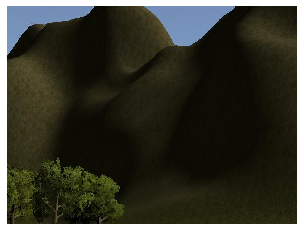

UNKNOWN [id=1],(score = 0.99990)
RED [id=3],(score = 0.00007)
GREEN [id=2],(score = 0.00002)
YELLOW [id=0],(score = 0.00002)

images/light_490.jpg


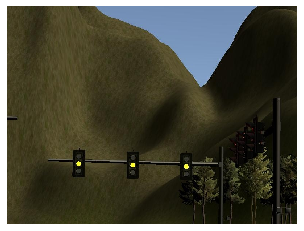

YELLOW [id=0],(score = 0.99887)
GREEN [id=2],(score = 0.00055)
RED [id=3],(score = 0.00040)
UNKNOWN [id=1],(score = 0.00018)

images/light_257.jpg


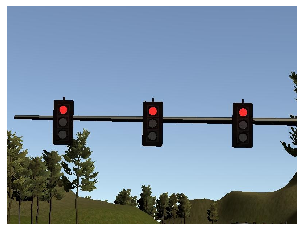

RED [id=3],(score = 0.99890)
YELLOW [id=0],(score = 0.00073)
GREEN [id=2],(score = 0.00036)
UNKNOWN [id=1],(score = 0.00001)



In [7]:
lines = tf.gfile.GFile('output_labels.txt').readlines()

uid_to_human = {}

# 一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

# 分类编号变成描述
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放训练好的模型
with tf.gfile.GFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

print(uid_to_human)

with tf.Session() as sess:
    # final_result为输出tensor的名字
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    #tensor_name_list = [tensor.name for tensor in tf.get_default_graph().as_graph_def().node]
    #for tensor_name in tensor_name_list:
    #    print(tensor_name, '\n')

    # 遍历目录
    for root,dirs,files in os.walk('images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.GFile(os.path.join(root,file), 'rb').read()
            # 把图像数据传入模型获得模型输出结果
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})
            # 把结果转为1维数据
            predictions = np.squeeze(predictions)
            # 打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[::-1]
            for node_id in top_k:     
                # 获取分类名称
                human_string = id_to_string(node_id)
                # 获取该分类的置信度
                score = predictions[node_id]
                print('%s [id=%d],(score = %.5f)' % (human_string, node_id, score))
            print()